**The dataset** is collected from UCI Machine Learning Repository through the following [link](https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#)

extract data with its default name `pd_speech_features.csv` in `__data__` directory

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [2]:
df = pd.read_csv('./__data__/pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


### Preprocessing Data

* Remove nearly the same data
> pearson correlation provided by [pandas][pd.df.corr] is used
![feature correlations](./doc/images/correlation.jpg "correlation")

> For high quality image, visit [this notebook](kaggle_corr)  


[pd.df.corr]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
[kaggle_corr]: https://www.kaggle.com/kerneler/starter-parkinson-s-disease-pd-33cbce88-7

In [105]:
X = df.copy()
y = X.pop('class')

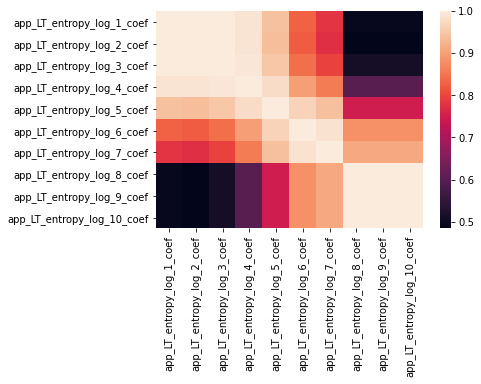

In [106]:
%matplotlib inline
app_LT_entropy_logs = [att for att in X.columns.values if att.startswith('app_LT_entropy_log')]
sns.heatmap(X[app_LT_entropy_logs].corr(), annot=False)

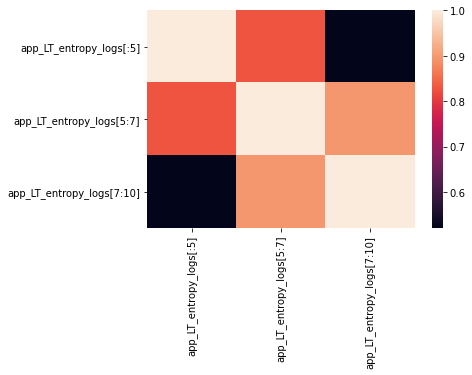

In [107]:
selected_feature = app_LT_entropy_logs[:5]
X['app_LT_entropy_logs[:5]'] = X[selected_feature].mean(numeric_only=True, axis=1)
X.drop(selected_feature, axis=1, inplace=True)

selected_feature = app_LT_entropy_logs[5:7]
X['app_LT_entropy_logs[5:7]'] = X[selected_feature].mean(numeric_only=True, axis=1)
X.drop(selected_feature, axis=1, inplace=True)

selected_feature = app_LT_entropy_logs[7:10]
X['app_LT_entropy_logs[7:10]'] = X[selected_feature].mean(numeric_only=True, axis=1)
X.drop(selected_feature, axis=1, inplace=True)

%matplotlib inline
app_LT_entropy_logs = [att for att in X.columns if att.startswith('app_LT_entropy_log')]
sns.heatmap(X[app_LT_entropy_logs].corr(), annot=False)


In [ ]:
# Convert to data to numpy nd arrays
X = X.to_numpy()
y = y.values

### Metrics

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    matthews_corrcoef
)

kf = KFold(n_splits=5)

def get_metrics(model, X, y):
    _metrics = {"accuracy": 0, "precision": 0, "recall": 0, "fMeasure": 0, "mcc": 0}

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_true = y_test

        _metrics["accuracy"] += accuracy_score(y_true, y_pred)
        _metrics["precision"] += precision_score(y_true, y_pred)
        _metrics["recall"] += recall_score(y_true, y_pred)
        _metrics["fMeasure"] += f1_score(y_true, y_pred)
        _metrics["mcc"] += matthews_corrcoef(y_true, y_pred)


    # average
    n_splits = kf.get_n_splits(X)
    for metric in _metrics:
        _metrics[metric] /= n_splits
    
    _metrics['_meta'] = {
        "nSplits": n_splits,
        "modelType": type(model).__name__,
        "hyperParameters": model.get_params()
    }

    return _metrics


### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
metrics = get_metrics(model, X, y)
pprint(metrics)

{'_meta': {'hyperParameters': {'ccp_alpha': 0.0,
                               'class_weight': None,
                               'criterion': 'gini',
                               'max_depth': None,
                               'max_features': None,
                               'max_leaf_nodes': None,
                               'min_impurity_decrease': 0.0,
                               'min_impurity_split': None,
                               'min_samples_leaf': 1,
                               'min_samples_split': 2,
                               'min_weight_fraction_leaf': 0.0,
                               'presort': 'deprecated',
                               'random_state': None,
                               'splitter': 'best'},
           'modelType': 'DecisionTreeClassifier',
           'nSplits': 5},
 'accuracy': 0.7209219240153363,
 'fMeasure': 0.8150160266070505,
 'precision': 0.8083279519100903,
 'recall': 0.8280514201355794}


### RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
metrics = get_metrics(model, X, y)
pprint(metrics)

{'_meta': {'hyperParameters': {'bootstrap': True,
                               'ccp_alpha': 0.0,
                               'class_weight': None,
                               'criterion': 'gini',
                               'max_depth': None,
                               'max_features': 'auto',
                               'max_leaf_nodes': None,
                               'max_samples': None,
                               'min_impurity_decrease': 0.0,
                               'min_impurity_split': None,
                               'min_samples_leaf': 1,
                               'min_samples_split': 2,
                               'min_weight_fraction_leaf': 0.0,
                               'n_estimators': 100,
                               'n_jobs': None,
                               'oob_score': False,
                               'random_state': None,
                               'verbose': 0,
                               'warm_start'

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
metrics = get_metrics(model, X, y)
pprint(metrics)

{'_meta': {'hyperParameters': {'ccp_alpha': 0.0,
                               'criterion': 'friedman_mse',
                               'init': None,
                               'learning_rate': 0.1,
                               'loss': 'deviance',
                               'max_depth': 3,
                               'max_features': None,
                               'max_leaf_nodes': None,
                               'min_impurity_decrease': 0.0,
                               'min_impurity_split': None,
                               'min_samples_leaf': 1,
                               'min_samples_split': 2,
                               'min_weight_fraction_leaf': 0.0,
                               'n_estimators': 100,
                               'n_iter_no_change': None,
                               'presort': 'deprecated',
                               'random_state': None,
                               'subsample': 1.0,
                           

In [50]:
from sklearn.svm import SVC as SVM
model = SVM()
metrics = get_metrics(model, X, y)
pprint(metrics)

{'_meta': {'hyperParameters': {'C': 1.0,
                               'break_ties': False,
                               'cache_size': 200,
                               'class_weight': None,
                               'coef0': 0.0,
                               'decision_function_shape': 'ovr',
                               'degree': 3,
                               'gamma': 'scale',
                               'kernel': 'rbf',
                               'max_iter': -1,
                               'probability': False,
                               'random_state': None,
                               'shrinking': True,
                               'tol': 0.001,
                               'verbose': False},
           'modelType': 'SVC',
           'nSplits': 5},
 'accuracy': 0.7328511676542349,
 'fMeasure': 0.8413565256941714,
 'precision': 0.7518992895514713,
 'recall': 0.9597809834633537}


|method        | accuracy | f-measure | percision | recall | MCC |
|:------       |:--------:|:---------:|:---------:|:------:|:---:|
|SVM           | 0.732    | 0.841     | 0.751     | 0.959  |  -  |
|Decision tree | 0.72     | 0.815     | 0.808     | 0.828  |  -  |
|Random Forest | 0.832    | 0.892     | 0.842     | 0.951  |  -  |
|XGBoost       | 0.841    | 0.896     | 0.857     | 0.939  |  -  |
|[paper][link] | 0.86     | 0.84      |   -       |    -   | 0.59|


[link]: https://www.sciencedirect.com/science/article/abs/pii/S1568494618305799?via%3Dihub



- [ ] TODO: Tune hyper parameters
- [ ] TODO: Plot correlations for data information
- [ ] TODO: Scatter plot for data information
- [ ] TODO: Reduce features dimension by feature selection

